
# Professional Pandas: The Pandas Merge Method

## By Matt Harrison (@\_\_mharrison\_\_)

In this post, I discuss the relationship between the Pandas `merge` function (and `.merge` method), and the Pandas `.join` method, and then show examples of how to merge Pandas dataframes with the Pandas `.merge` method. Along the way, I describe two useful `.merge` method parameters: the `validate` parameter, and the `indicator` parameter.

This article is the second in our Professional Pandas blog post series. The goal of this series is to teach best practices about writing professional-grade Pandas code. If you have questions or topics that you would like to dive into, please reach out on Twitter to [@ponderdata](https://twitter.com/intent/follow?screen_name=ponderdata) or [@\_\_mharrison\_\_](https://twitter.com/__mharrison__), and if you’d like to see the notebook version of this blogpost, you can find it on Github here.

(Note: This content is modified from the author's book, *Effective Pandas*.)

## Joining Data

### Quick Terminology Refresher: Method vs. Function

Pandas often has one, two, three, or even more ways to do something. This paradox of choice can be overwhelming. (Indeed software engineering purists would say "[There should be one-- and preferably only one --obvious way to do it](https://colab.research.google.com/drive/11UVVOma3KIJNrmfB9RGj6o5i0iVkl8es#scrollTo=7SshRpi-irsJ&line=41&uniqifier=1).") However, here we are with Pandas joining.

In short, there is :

* The `.join` method found on a DataFrame
* The `.merge` method found on a DataFrame
* The `pd.merge` function found in the Pandas namespace (`pd`)
* The `pd.concat` function to horizontally or vertically stack data
* Various methods that align on the index and work similar to some joins (like using `df.assign(**other_df)`)

*NOTE - Python Language Aside*

A Python class defines methods. Methods are called on an instance of a class. In the Pandas world, we often have a DataFrame (`df`) or Series (`s`) instance. We could call the `.merge` method by saying:

    df.merge(another_df)

However, there is also a function, `merge`. (I write methods with a period in front as a reminder that they need to be called on the instance, and I leave the period out for functions.) Generally, when folks use Pandas they import the library like this:

    import pandas as pd

Since `pd` is the module where the `merge` function is available, you can call the `merge` function like this:

    pd.merge(df, another_df)

Some think that in this last example that `merge` is a method on `pd`. That is not correct. If we change the import to load the function, we could run the code like this:

     from pandas import merge

     merge(df, another_df)

If you aren't familiar with the difference between methods and functions and would like to explore more, check out the [Python tutorial](https://docs.python.org/3/tutorial/classes.html#:~:text=A%20method%20is%20a%20function,%2C%20sort%2C%20and%20so%20on).

*END NOTE*     

From this author's point of view, forget that the `merge` function and the `.join` method exist. You can get along just fine only using the `.merge` method.

In fact, if you dig into the implementation of `.join`, you will see that it calls `concat` or `merge`. Don't waste your brain power trying to keep them straight. Just ignore the `merge` function and the `.join` method.

One final note, I wish that `.merge` was named `.join` because everyone coming from a database world knows what a join is, but `.merge` offers a little more functionality, hence my recommendation to favor it.




## A Short Overview of Joining

Feel free to skip this if you are familiar with database joins. It shows the basic joins using some sales data. Our task might be to find products with no sales, sales that don't have products, or only sales for products that we have information for.

The supported join types for `.merge` (specified with the `how` parameter) are:

* `'left'` - Keep all values from the merging column DataFrame the method was called on.
* `'right'` - Keep all values from the merging column of the `right` DataFrame the method was called on.
* `'inner'` - Keep the intersection of all values from the merging columns.
* `'outer'` - Keep the union of all values from the merging columns.
* `'cross'` - For every row in the instance dataframe, combine with every row from the `right` DataFrame.

In [ ]:
import pandas as pd
products = pd.DataFrame({'id': [1, 3, 10], 'product': 
                         ['Cat food', 'Sparkling Water', 'Apple Fritter']})
sales = pd.DataFrame({'product_id': [1, 3, 1, 1, 15], 
                      'cost': [4.99, .99, 4.99, 4.99*.8, 7.45]})

In [ ]:
# left join
# keep all *id* columns
products.merge(sales, left_on='id', right_on='product_id', how='left')

,id,product,product_id,cost
0,1,Cat food,1.0,4.990
1,1,Cat food,1.0,4.990
2,1,Cat food,1.0,3.992
3,3,Sparkling Water,3.0,0.990
4,10,Apple Fritter,NaN,NaN


In [ ]:
# right join
# keep all *product_id* columns
products.merge(sales, left_on='id', right_on='product_id', how='right')

,id,product,product_id,cost
0,1.0,Cat food,1,4.990
1,3.0,Sparkling Water,3,0.990
2,1.0,Cat food,1,4.990
3,1.0,Cat food,1,3.992
4,NaN,NaN,15,7.450


In [ ]:
# inner join
products.merge(sales, left_on='id', right_on='product_id', how='inner')

,id,product,product_id,cost
0,1,Cat food,1,4.990
1,1,Cat food,1,4.990
2,1,Cat food,1,3.992
3,3,Sparkling Water,3,0.990


In [ ]:
# outer join
products.merge(sales, left_on='id', right_on='product_id', how='outer')

,id,product,product_id,cost
0,1.0,Cat food,1.0,4.990
1,1.0,Cat food,1.0,4.990
2,1.0,Cat food,1.0,3.992
3,3.0,Sparkling Water,3.0,0.990
4,10.0,Apple Fritter,NaN,NaN
5,NaN,NaN,15.0,7.450


A merge you might not be aware of is the *cross* join. This repeats every row of the dataframe with every row that it is merged with. (So this gets big real fast).

In [ ]:
# cross join
products.merge(sales, how='cross')

,id,product,product_id,cost
0,1,Cat food,1,4.990
1,1,Cat food,3,0.990
2,1,Cat food,1,4.990
3,1,Cat food,1,3.992
4,1,Cat food,15,7.450
5,3,Sparkling Water,1,4.990
6,3,Sparkling Water,3,0.990
7,3,Sparkling Water,1,4.990
8,3,Sparkling Water,1,3.992
9,3,Sparkling Water,15,7.450


A cross join might come in handy if you need to create all the permutations of some values. In this example, all ways to select three different values from four or ten.

In [ ]:
nums = pd.DataFrame({'values':[4, 10]})
(nums
 .merge(nums, how='cross')
 .merge(nums, how='cross')
)

,values_x,values_y,values
0,4,4,4
1,4,4,10
2,4,10,4
3,4,10,10
4,10,4,4
5,10,4,10
6,10,10,4
7,10,10,10


## Validation

I will sometimes use a `.pipe` method to track the size of my data before and after the merge. If you are doing a lot of merges, this will be a snippet of code you will want to keep around.

(Check out the article [Professional Pandas: The Pandas Assign Method](https://ponder.io/professional-pandas-the-pandas-assign-method-and-chaining/) for more examples of the `.pipe` method.)

In [ ]:
def debug_shape(a_df, comment=''):
    print(f'{a_df.shape} {comment}')
    return a_df

(products
 .pipe(debug_shape, 'before merge')
 .merge(sales, left_on='id', right_on='product_id', how='outer')
 .pipe(debug_shape, 'after merge')
)

(3, 2) before merge
(6, 4) after merge


,id,product,product_id,cost
0,1.0,Cat food,1.0,4.990
1,1.0,Cat food,1.0,4.990
2,1.0,Cat food,1.0,3.992
3,3.0,Sparkling Water,3.0,0.990
4,10.0,Apple Fritter,NaN,NaN
5,NaN,NaN,15.0,7.450


A very nice feature of the `.merge` method is the `validate` parameter. It allows us to specify if our merge should be *one to one* (`'1:1'`), *one to many* (`'1:m'`), *many to one* (`'m:1'`), or *many to many* (`'m:m'`).

If your data grows much faster after a merge that might be because you are merging on duplicate values. In our example, the *product_id* repeats in the `products` DataFrame. If we were expecting only a single row for the *Cat food* product and one row from `sales` for each row from `product`, we could pass in `validate='1:1'` parameter.

In this case, Pandas complains that the entries from `sales` are not unique. This is because there were multiple sales for the *Cat food* product:

In [ ]:
(products
 .merge(sales, left_on='id', right_on='product_id', how='outer',
        validate='1:1')
)

MergeError: ignored

We would need to use `validate='1:m'` on this example:

In [ ]:
(products
 .merge(sales, left_on='id', right_on='product_id', how='outer',
        validate='1:m')
)

,id,product,product_id,cost
0,1.0,Cat food,1.0,4.990
1,1.0,Cat food,1.0,4.990
2,1.0,Cat food,1.0,3.992
3,3.0,Sparkling Water,3.0,0.990
4,10.0,Apple Fritter,NaN,NaN
5,NaN,NaN,15.0,7.450


(Note that specifying `validate='m:m'` can't ever fail, but it could be a nice indicator to whoever reads the code next.)

One more parameter to be aware of is the `indicator` parameter. This allows us to create a new column indicating which DataFrame the resulting row came from. In this example we specify that the new column should be named *side*:

In [ ]:
(products
 .merge(sales, left_on='id', right_on='product_id', how='outer',
        indicator='side')
)

,id,product,product_id,cost,side
0,1.0,Cat food,1.0,4.990,both
1,1.0,Cat food,1.0,4.990,both
2,1.0,Cat food,1.0,3.992,both
3,3.0,Sparkling Water,3.0,0.990,both
4,10.0,Apple Fritter,NaN,NaN,left_only
5,NaN,NaN,15.0,7.450,right_only


## Example: Dirty Devil Flow and Weather Data

Now let's look at a real-world example.

We are going to explore data from the Dirty Devil river. This is a river in Utah that the author had some interest in floating down. However, it is only floatable during a small period of time each year. This analysis was part of his attempt to determine when would be a good time to float down this river.

I have some historic data about the flow of the Dirty Devil river on my Github. Let's load the flow (cubic feet per second, or cfs) and gage height data. In this case we will leave the datetime column as a column and not use it for the index:

In [ ]:
>>> import pandas as pd
>>> url = 'https://github.com/mattharrison/datasets/raw/master'\
...     '/data/dirtydevil.txt'
>>> df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,
...                  sep='\t')
>>> def to_denver_time(df_, time_col, tz_col):
...     return (df_
...      .assign(**{tz_col: df_[tz_col].replace('MDT', 'MST7MDT')})
...      .groupby(tz_col)
...      [time_col]
...      .transform(lambda s: pd.to_datetime(s)
...          .dt.tz_localize(s.name, ambiguous=True)
...          .dt.tz_convert('America/Denver'))
...     )

>>> def tweak_river(df_):
...     return (df_
...      .assign(datetime=to_denver_time(df_, 'datetime', 'tz_cd'))
...      .rename(columns={'144166_00060': 'cfs',
...                       '144167_00065': 'gage_height'})
...     )

>>> dd = tweak_river(df)
>>> dd

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00:00-06:00,MDT,71.00,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15:00-06:00,MDT,71.00,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30:00-06:00,MDT,71.00,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45:00-06:00,MDT,70.00,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00:00-06:00,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...,...
539300,USGS,9333500,2020-09-28 08:30:00-06:00,MDT,9.53,P,6.16,P
539301,USGS,9333500,2020-09-28 08:45:00-06:00,MDT,9.20,P,6.15,P
539302,USGS,9333500,2020-09-28 09:00:00-06:00,MDT,9.20,P,6.15,P
539303,USGS,9333500,2020-09-28 09:15:00-06:00,MDT,9.20,P,6.15,P


I\'m also going to load some [meteorological data from Hanksville,
Utah](https://www.ncdc.noaa.gov/cdo-web/), a city nearby the river. We will then use the Pandas merge method to join both datasets together
so we have flow data as well as temperature and precipitation
information.

Some of the columns that are interesting are:

-   *DATE* - Date
-   *PRCP* - Precipitation in inches
-   *TMIN* - Minimum temperature (F) for day
-   *TMAX* - Maximum temperature (F) for day
-   *TOBS* - Observed temperature (F) when measurement made


In [ ]:
>>> url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
...       'hanksville.csv'

>>> temp_df = pd.read_csv(url)
>>> def tweak_temp(df_):
...     return (df_
...            .assign(DATE=pd.to_datetime(df_.DATE)
...                 .dt.tz_localize('America/Denver', ambiguous=False))
...            .loc[:,['DATE', 'PRCP', 'TMIN', 'TMAX', 'TOBS']]
...     )

>>> temp_df = tweak_temp(temp_df)
>>> temp_df

,DATE,PRCP,TMIN,TMAX,TOBS
0,2000-01-01 00:00:00-07:00,0.02,21.0,43.0,28.0
1,2000-01-02 00:00:00-07:00,0.03,24.0,39.0,24.0
2,2000-01-03 00:00:00-07:00,0.00,7.0,39.0,18.0
3,2000-01-04 00:00:00-07:00,0.00,5.0,39.0,25.0
4,2000-01-05 00:00:00-07:00,0.00,10.0,44.0,22.0
...,...,...,...,...,...
6843,2020-09-20 00:00:00-06:00,0.00,46.0,92.0,83.0
6844,2020-09-21 00:00:00-06:00,0.00,47.0,92.0,84.0
6845,2020-09-22 00:00:00-06:00,0.00,54.0,84.0,77.0
6846,2020-09-23 00:00:00-06:00,0.00,47.0,91.0,87.0


# Joining Data

Let\'s use `.merge` and merge by date. This method will try to
merge by columns that have the same name, but our dataframes don't have overlapping column names. The `dd` dataframe has a
*datetime* column and `temp_df` has a *DATE* column. We can use the
`left_on` and `right_on` parameters to help it know how to align the
data. The `.merge` method tries to do an *inner join* by default. That
means that rows with values that are the same in the merge columns will
be joined together:

In [ ]:
>>> (dd
... .merge(temp_df, left_on='datetime', right_on='DATE')
... )

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd,DATE,PRCP,TMIN,TMAX,TOBS
0,USGS,9333500,2001-05-08 00:00:00-06:00,MDT,75.00,A:[91],NaN,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
1,USGS,9333500,2001-05-09 00:00:00-06:00,MDT,64.00,A:[91],NaN,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
2,USGS,9333500,2001-05-10 00:00:00-06:00,MDT,54.00,A:[91],NaN,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
3,USGS,9333500,2001-05-11 00:00:00-06:00,MDT,56.00,A:[91],NaN,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
4,USGS,9333500,2001-05-12 00:00:00-06:00,MDT,49.00,A:[91],NaN,NaN,2001-05-12 00:00:00-06:00,0.0,45.0,93.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,USGS,9333500,2020-09-20 00:00:00-06:00,MDT,6.04,P,6.04,P,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
4969,USGS,9333500,2020-09-21 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
4970,USGS,9333500,2020-09-22 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
4971,USGS,9333500,2020-09-23 00:00:00-06:00,MDT,7.68,P,6.10,P,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


This appears to have worked, but is somewhat problematic. Remember that
the `dd` dataset has a 15-minute frequency, but `temp_df` only has daily
data, so we are only using the value from midnight. We should probably
use our resampling skills to calculate the median flow value for each
date and then merge. In that case we will want to use the index of the
grouped data to merge, so we specify `left_index=True`:

In [ ]:
>>> (dd
...  .groupby(pd.Grouper(key='datetime', freq='D'))
...  .median()
...  .merge(temp_df, left_index=True, right_on='DATE')
... )

,site_no,cfs,gage_height,DATE,PRCP,TMIN,TMAX,TOBS
492,9333500.0,71.50,NaN,2001-05-07 00:00:00-06:00,0.0,41.0,82.0,55.0
493,9333500.0,69.00,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
494,9333500.0,63.50,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.83,6.07,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
6844,9333500.0,6.83,6.07,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
6845,9333500.0,7.39,6.09,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
6846,9333500.0,7.97,6.11,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


That looks better (and gives us a few more rows of data).

---



## Validating Joined Data

Let\'s validate that we had a one-to-one join, i.e. each date from the
flow data matched up with a single date from the temperature data. We
can use the `validate` parameter to do this:

In [ ]:
>>> (dd
...  .groupby(pd.Grouper(key='datetime', freq='D'))
...  .median()
...  .merge(temp_df, left_index=True, right_on='DATE', how='inner',
...         validate='1:1')
... )

,site_no,cfs,gage_height,DATE,PRCP,TMIN,TMAX,TOBS
492,9333500.0,71.50,NaN,2001-05-07 00:00:00-06:00,0.0,41.0,82.0,55.0
493,9333500.0,69.00,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
494,9333500.0,63.50,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.83,6.07,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
6844,9333500.0,6.83,6.07,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
6845,9333500.0,7.39,6.09,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
6846,9333500.0,7.97,6.11,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


Because this did not raise a `MergeError`, we know that our data had
non-repeating date fields.

## Visualization of Data Joined with the Pandas Merge Method

I\'m a big fan of visualization. Let\'s visualize the
merged time series. We will add on to our merge chain, stick the date in
the index (so that we can plot it on the x-axis), pull out the years from 2014 forward, use the *cfs* (cubic feet per second),
*gage_height*, *PRCP*, and *TOBS* columns, interpolate the missing
values, do a rolling 15-day average, and plot the result in their own
subplot:

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


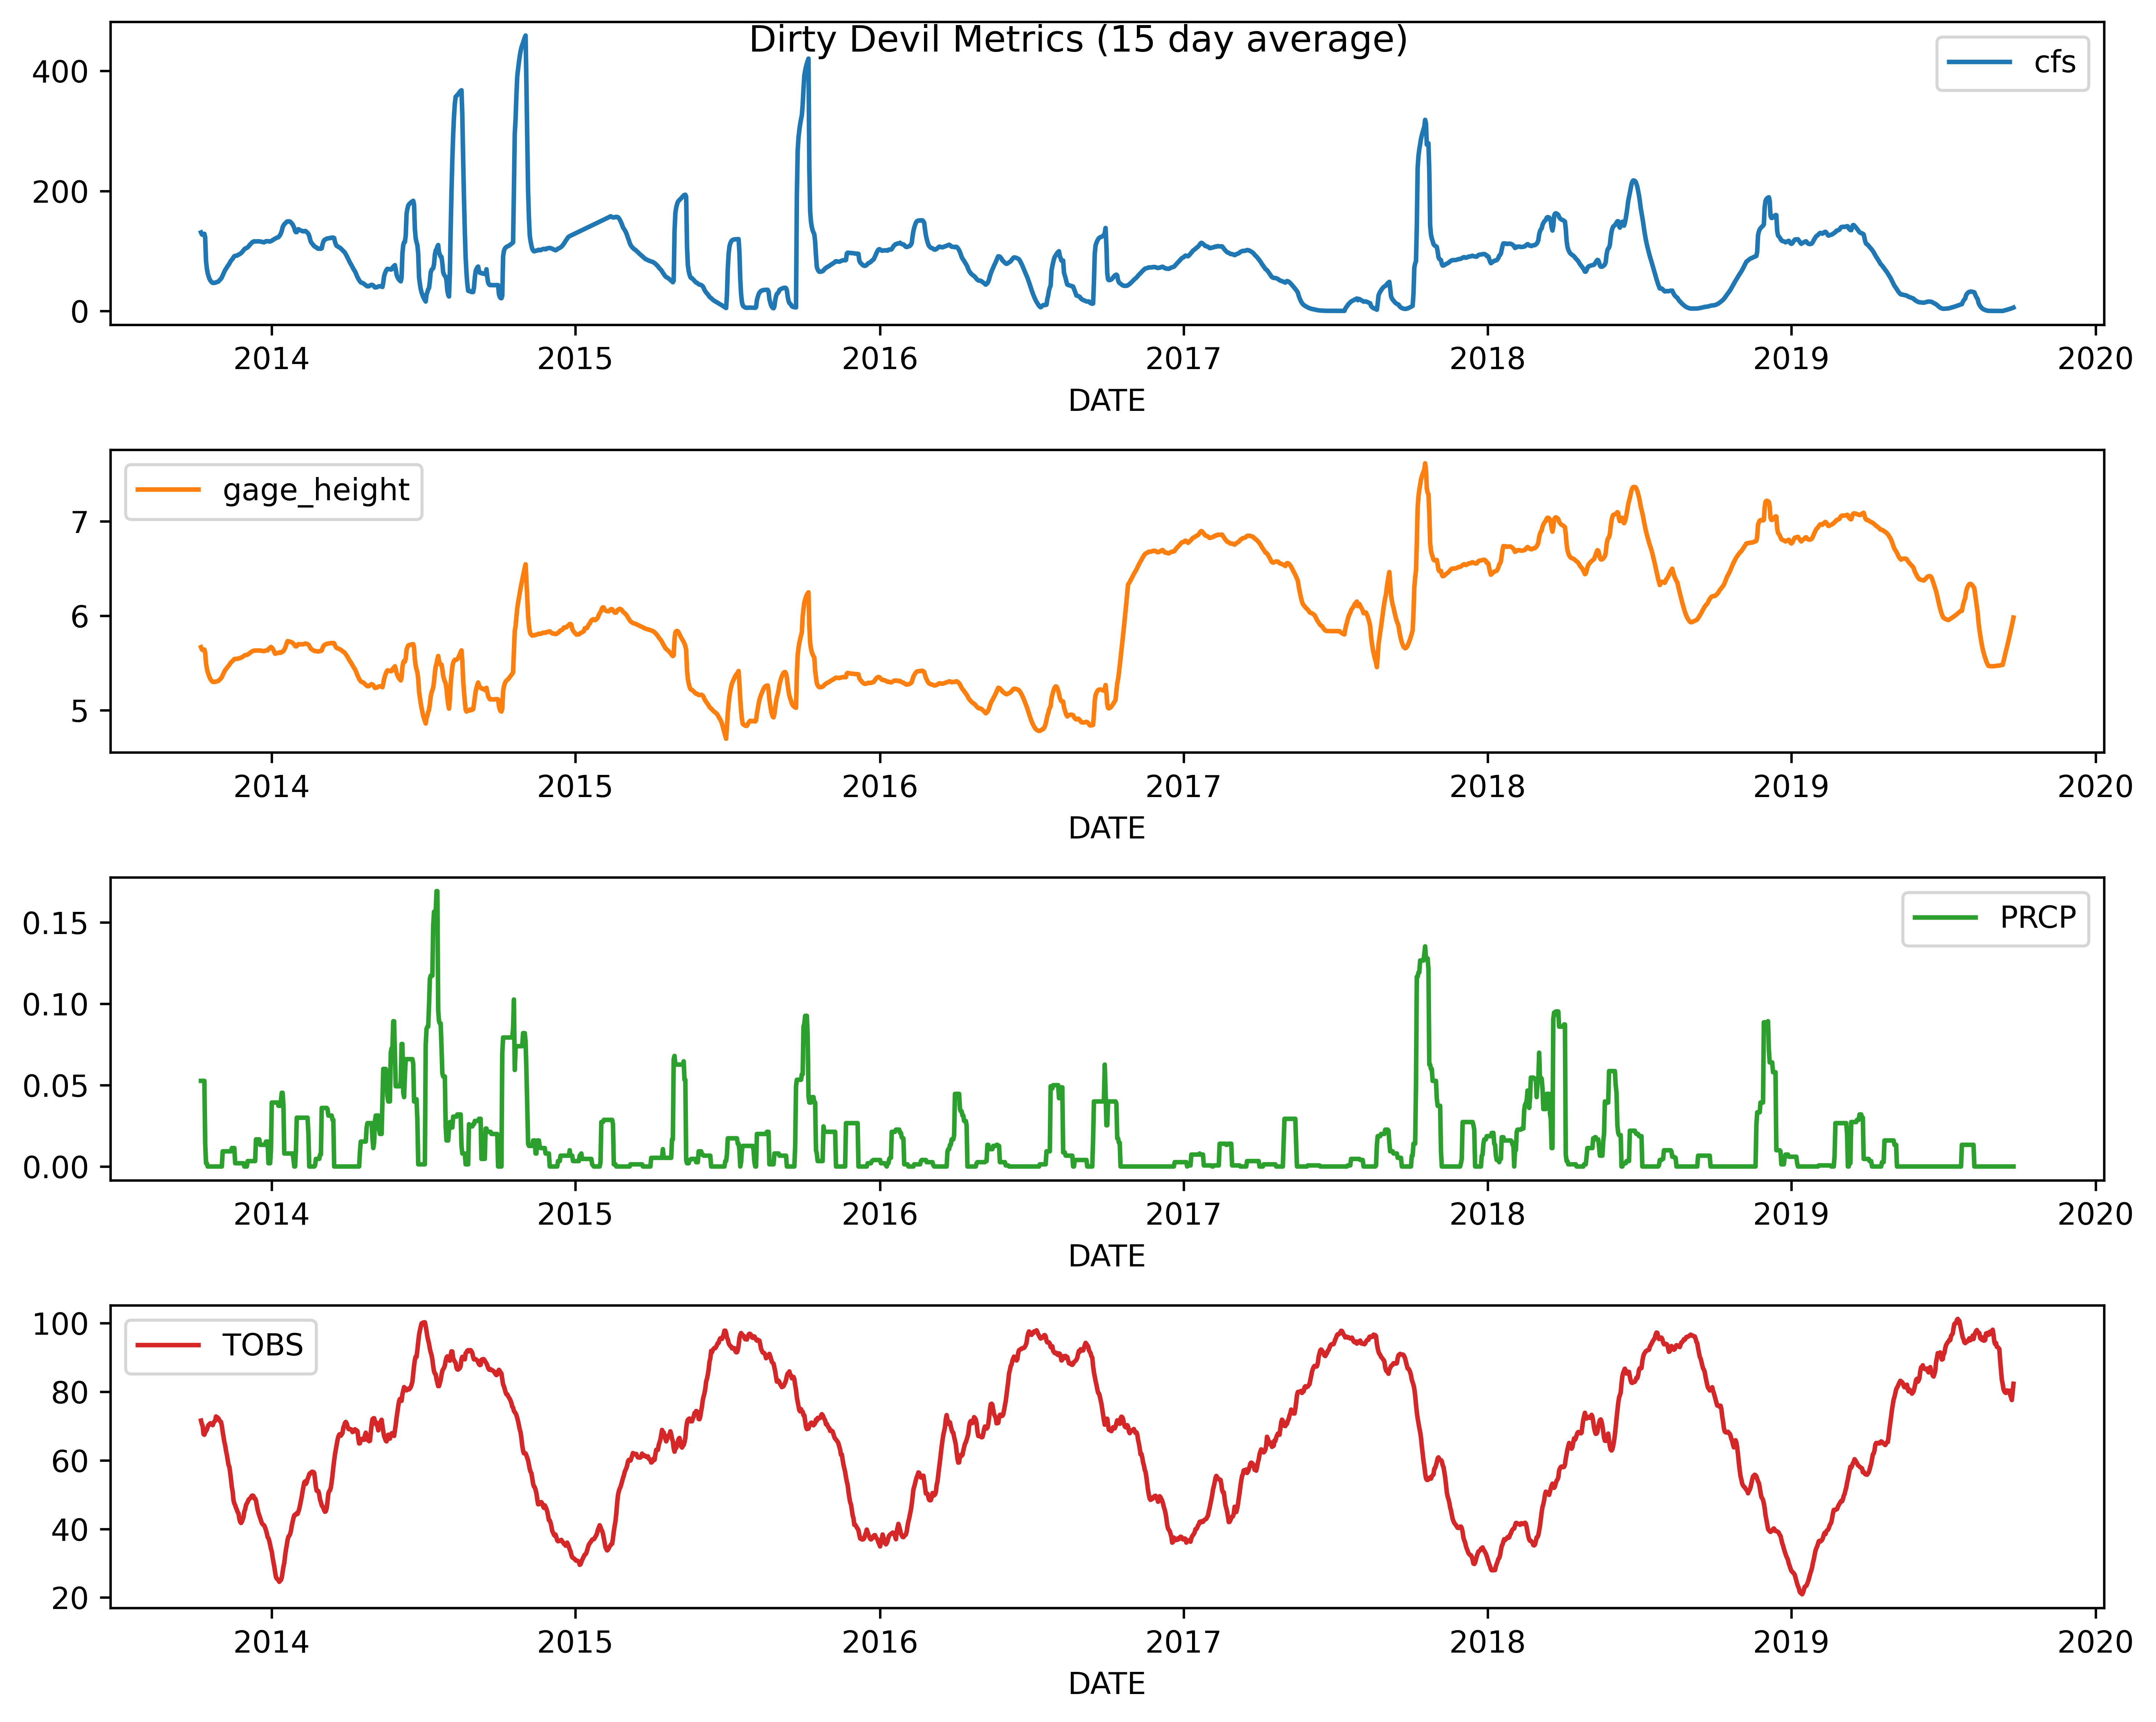

In [ ]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(dpi=600, figsize=(10,8))  
>>> (dd   
...  .groupby(pd.Grouper(key='datetime', freq='D'))
...  .median()
...  .merge(temp_df, left_index=True, right_on='DATE', how='inner',
...         validate='1:1')
...  .set_index('DATE')
...  .loc['2014':,['cfs', 'gage_height', 'PRCP', 'TOBS']]
...  .interpolate()
...  .rolling(15)
...  .mean()
...  .plot(subplots=True, ax=ax)
... )
>>> fig.suptitle('Dirty Devil Metrics (15-day average)')
>>> fig.tight_layout()

Here\'s another plot that is kind of cool once you piece together what is happening. It is a scatterplot of temperature against river flow. I\'m coloring
this by month of the year. You can see the start of the year at the bottom of the plot. As the year progresses and the temperature warms up, the *cfs* goes up a little, and then as summer hits, the river almost dries up. During the fall, it starts to cool off and the river starts running higher:

Text(0.5, 1.0, 'Observation Temperature (TOBS) vs River Flow (cubic feet per sec)\nColored by Month')

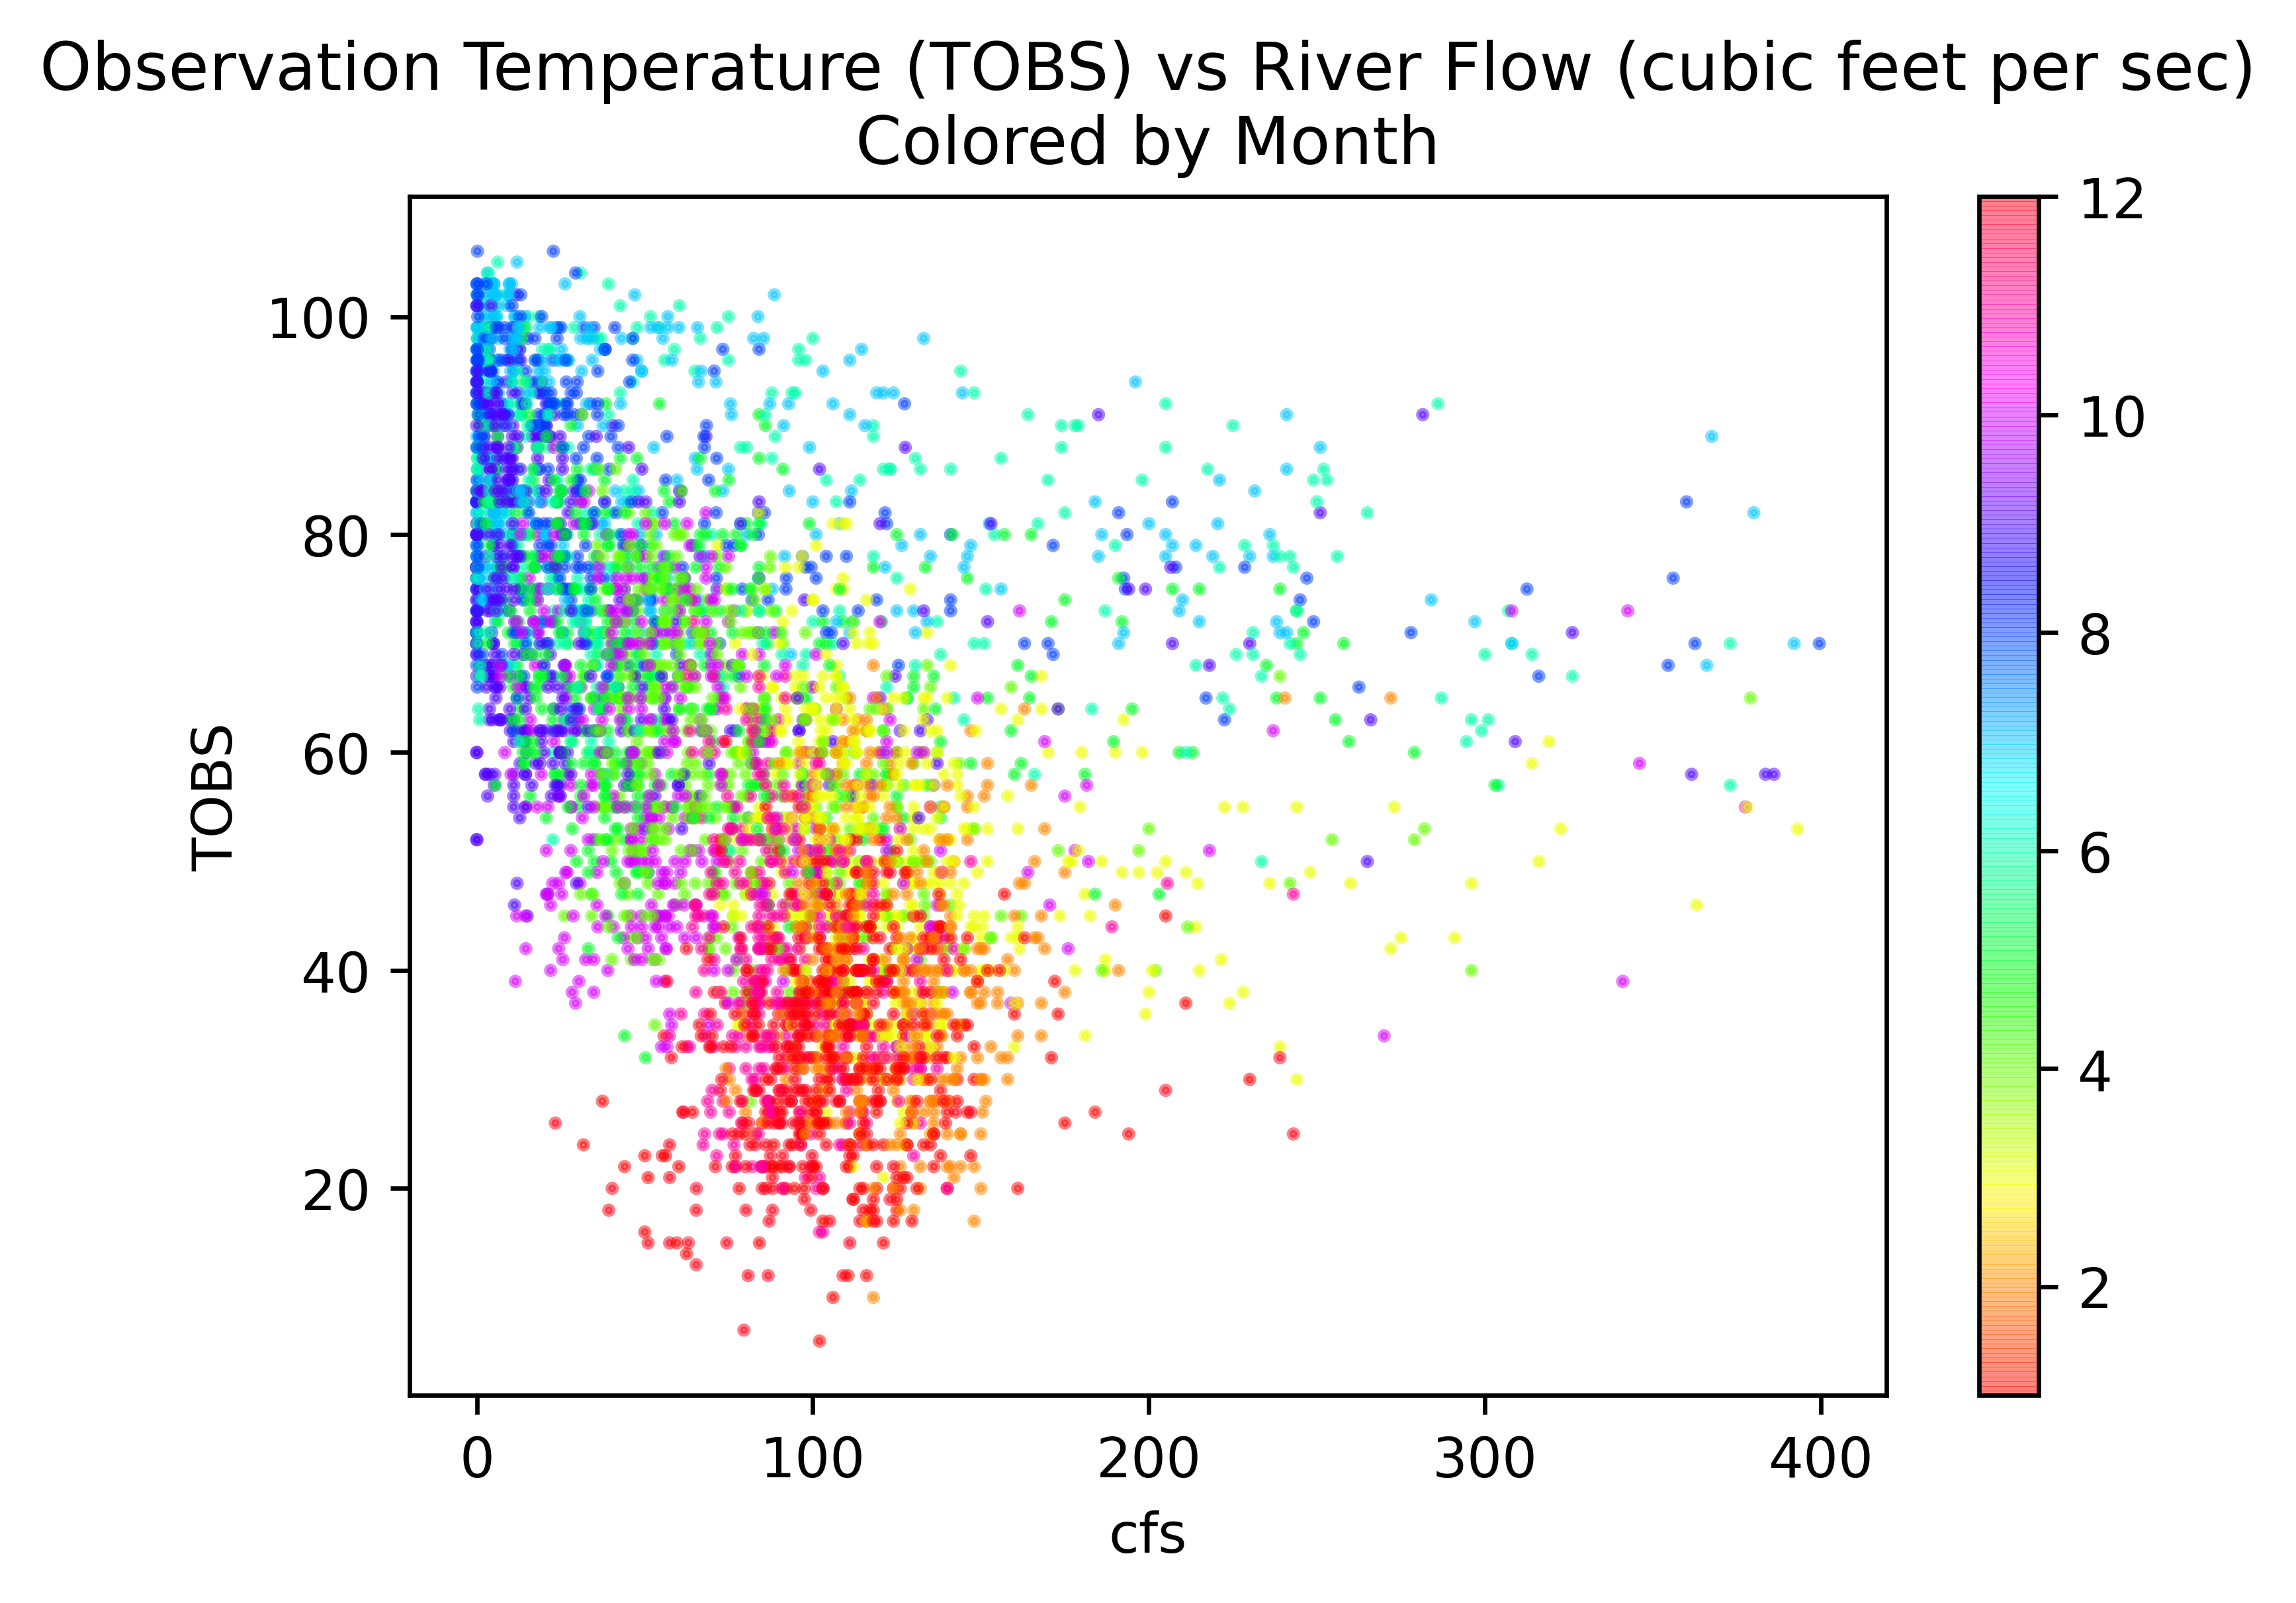

In [ ]:
>>> fig, ax = plt.subplots(dpi=600)
>>> dd2 = (dd
...  .groupby(pd.Grouper(key='datetime', freq='D'))
...  .median()
...  .merge(temp_df, left_index=True, right_on='DATE', how='inner',
...         validate='1:1')
...  .query('cfs < 400')           
... )
>>> (dd2
...  .plot.scatter(x='cfs', y='TOBS', c=dd2.DATE.dt.month,
...                ax=ax, cmap='hsv', alpha=.5, s=2)           
... )
>>> ax.set_title('Observation Temperature (TOBS) '
...    'vs River Flow (cubic feet per sec)\nColored by Month')

## Summary

Data can often have more utility if we combine it with other data. In the \'70s, *relational algebra* was invented to describe various joins among tabular data. The `.merge` method of the `DataFrame` lets us apply these operations to tabular data in the Pandas world. This post explored using the `.merge` method and the parameters you can use to validate your joining logic.

We would love to hear your feedback. Was this helpful? Did you learn anything new? Tag [@ponderdata](https://twitter.com/intent/follow?screen_name=ponderdata) and [@\_\_mharrison\_\_](https://twitter.com/__mharrison__) on Twitter with your insights, and follow both for more content like this. And feel free to suggest new topics you’d like us to dive into for our next Professional Pandas blog post!

### About Ponder
Ponder is the company driving Modin and pushing to scale Pandas with you. If you want to scale your Pandas code out to large datasets by changing a single line of code, try [the Modin library](https://github.com/modin-project/modin#readme). If you need help running your Pandas workloads in production at scale, [talk to us](https://ponder.io/contact/)!